# Сборный проект №1 - Игры (до 2016)

Перед нами исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. <br>

Требуется выявить определяющие успешность игры закономерности, которые позволят интернет-магазину «Стримчик», продающему компьютерные игры по всему миру, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Содержание

* [Импорт, чтение данных, общая информация.](#import)
* [Предобработка данных.](#Предобработка_данных)
* [Расчеты.](#Расчеты)
    * [Продажи](#Продажи)
* [Исследовательский анализ данных.](#eda)
* [Портрет пользователя.](#user_profil)
* [Проверка гипотез.](#hypothesis)
* [Вывод.](#finish)

## Импорт, чтение данных, общая информация. 
<a class="anchor" id="import"></a>

In [1]:
# %pip install plotly --upgrade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats as st

In [3]:
# используем конструкцию try-except на случай если не получится работать над проектам локально
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    # для работы в Colab и загрузкой с google drive
    from google.colab import drive
    drive.mount("/content/gdrive")
    df = pd.read_csv('/content/gdrive/My Drive/DS/datasets/games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(25)

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
20                 Pokemon Diamond/Pokemon Pearl       DS           2006.0   
21                              Super Mario Land       GB           1989.0   
22                           Super Mario Bros. 3      NES           1988.0   
23                            Grand Theft Auto V     X360           2013.0   
24                   Grand Theft Auto: Vice City      PS2           2002.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   
20  Role-Playing      6.38      4.46      6.04         1.36           NaN   
21      Platform     10.83      2.71      4.18         0.42           NaN   
22      Platform      9.54      3.44      3.84         0.46           NaN   
23        Action      9.66      5.14      0.06         1.41          97.0   
24        Action      8.41      5.49      0.47         1.78          95.0   

   User_Scor

In [6]:
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

таблица из 16715 строк и 11 колонок. Есть пропуски. Требуется смена типов у некоторых колонок.

## Предобработка данных 
<a class="anchor" id="Предобработка_данных"></a>
[top](#Содержание)

In [7]:
# уберу заглавные буквы в именах колонок
df.columns = [col.lower() for col in df.columns]

### Name

In [8]:
df[df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [9]:
# избавимся от безымянных игр
# df.drop(df[df['name'].isna()].index, axis=0, inplace=True)
# df.reset_index(drop=True, inplace=True)

### platform

In [10]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

### year_of_release

In [11]:
df['year_of_release'].isna().value_counts(normalize=True)

False    0.983907
True     0.016093
Name: year_of_release, dtype: float64

Пропусков в году релиза игры - 269, это 1.6% от общего количества.
не буду пока их заменять

In [12]:
# менять тип на datetime смысла нет - можно просто сделать int
#  df.loc[~df['year_of_release'].isna(),'year_of_release'] = pd.to_datetime(df.loc[~df['year_of_release'].isna(),'year_of_release'],format='%Y').dt.year   # format='%Y'  dt.year

### Genre

In [13]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

### na_sales

In [14]:
df['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

### eu_sales

In [15]:
df['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

### jp_sales

In [16]:
df['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

### other_sales

In [17]:
df['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

### critic_score

In [18]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [19]:
df[df['critic_score'].isna()]['name'].count()

8576

Заменять пропуски пока не будую думаю они не помешают нам с вычислениями - а их заполнение искозит итоги.

### user_score

In [20]:
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [21]:
df[df['user_score'] == 'tbd'].head()

name platform  year_of_release  \
119                             Zumba Fitness      Wii           2010.0   
301            Namco Museum: 50th Anniversary      PS2           2005.0   
520                           Zumba Fitness 2      Wii           2011.0   
645                              uDraw Studio      Wii           2010.0   
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119     Sports      3.45      2.59       0.0         0.66           NaN   
301       Misc      2.08      1.35       0.0         0.54          61.0   
520     Sports      1.51      1.03       0.0         0.27           NaN   
645       Misc      1.65      0.57       0.0         0.20          71.0   
657  Adventure      2.15      0.18       0.0         0.07          73.0   

    user_score rating  
119        tbd      E  
301        tbd   E10+  
520        tbd      T  
645        tbd      E  
657        tbd      E

In [22]:
df[df['user_score'].isna()]['name'].count()

6699

чаще всего встречается tbd - скорее всего это аббревиатура от "To Be Determined"
Пользовательская оценка так и не была определена.

Для изменения типа данный в этой колонке на float заменю 'tbd' на NaN. Пропуски заменять пока не вижу смысла. 

In [23]:
#from dataclasses import replace
df['user_score'] = df['user_score'].replace('tbd',None)

In [24]:
df['user_score'] = df['user_score'].apply(float)

### rating

In [25]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Дубликатов нет

In [26]:
df[df.duplicated()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [27]:
# скопирую предобработанную таблицу для дальнейшей работы в wdf

wdf = df.copy()

## Расчеты <a class="anchor" id="Расчеты"></a> 
[top](#Содержание)

### общий столбец продаж  <a class="anchor" id="Продажи"></a>

In [28]:
wdf['all_sales'] = (sum([wdf['na_sales'],wdf['eu_sales'],wdf['jp_sales'],wdf['other_sales']])).round(2)

In [29]:
wdf.sample(5)

name platform  year_of_release  \
165                             Grand Theft Auto V     XOne           2014.0   
5282                                 Bloody Roar 3      PS2           2001.0   
10193  Paws & Claws Pet Vet: Australian Adventures       DS           2009.0   
9292                Call of Duty: Infinite Warfare       PC           2016.0   
3152                               TimeSplitters 2       XB           2002.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
165        Action      2.81      2.19      0.00         0.47          97.0   
5282     Fighting      0.15      0.11      0.05         0.04          71.0   
10193  Simulation      0.10      0.00      0.00         0.01           NaN   
9292      Shooter      0.04      0.08      0.00         0.01          73.0   
3152      Shooter      0.29      0.33      0.00         0.01          88.0   

       user_score rating  all_sales  
165           7.9      M       5.47  
5282          8.6      T       0.35  
10193         NaN    NaN       0.11  
9292          3.0      M       0.13  
3152          7.7      T       0.63

## Исследовательский анализ данных
<a class="anchor" id="eda"></a>

#### Cколько игр выпускалось в разные годы.

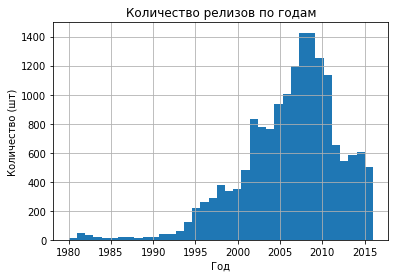

In [30]:
df['year_of_release'].hist(bins=37)
plt.title('Количество релизов по годам')
plt.xlabel('Год')
plt.ylabel('Количество (шт)')
plt.show()


Похоже что игровой бум начался примерно с 1995 года.

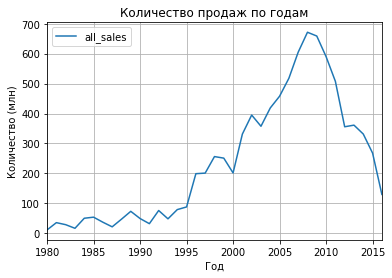

In [31]:
pd.pivot_table(wdf,index='year_of_release',values='all_sales',aggfunc='sum').plot(grid=True)
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество (млн)')
plt.show()

Продажи также указываю на начало бурного роста популярности игр с 1995 года.

Посмотрю подробнее информацию в разрезе платформ.

 #### Как менялись продажи по платформам. 
Выберу платформы с наибольшими суммарными продажами и посмотрю распределение по годам. 
Вычислю - за какой характерный срок появляются новые и исчезают старые платформы.

Сгруппирую данные по платформам для получения суммарного количества продаж

In [32]:
filtred_df = wdf.groupby(by='platform')['platform','all_sales'].sum().sort_values(by='all_sales', ascending=False)

 Соберу на сводную таблицу с продолжительностью жизни платформ

In [33]:
# функция для расчета срока между первым годом релиза игры и последним годом 
def life_period(arg):
    return max(arg)-min(arg) + 1
    
def its_a_live(arg):
    return max(arg)>2015 # если в 2016 были релизы - платформу зачтем живой

wdf_platform = pd.pivot_table(data=wdf, index='platform',values='year_of_release',aggfunc=['min','max',life_period,its_a_live,'count']) 


соединю полученные таблицы и переименую колонки

In [34]:
wdf_platform = wdf_platform.merge(filtred_df,how='left',left_on='platform', right_on='platform')
wdf_platform.columns = ['first_year','last_year','period','is_live','count_games','sum_sales']
wdf_platform.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



first_year  last_year  period  is_live  count_games  sum_sales
platform                                                                
2600          1980.0     1989.0    10.0    False          116      96.98
3DO           1994.0     1995.0     2.0    False            3       0.10
3DS           2011.0     2016.0     6.0     True          512     259.00
DC            1998.0     2008.0    11.0    False           52      15.95
DS            1985.0     2013.0    29.0    False         2121     806.12

хочу вычислить - на какой год жизни платформы приходится пик продаж игр

In [35]:
# сгруппирую таблицу по платформам и годам релизов суммирую продажи
# отсортирую по убыванию от самого удочного года 
# еще раз сгруппирую не предпринимая вычислений для групп и просто выберу первый в группе
filtred_wdf = wdf.groupby(['platform','year_of_release'], as_index=False ) \
.agg('sum') \
.sort_values('all_sales',ascending=False) \
.groupby('platform')[['platform','year_of_release','all_sales']] \
.head(1)

filtred_wdf.columns = ['platform','year_top_sales','top_sales']

добавлю эти данные в таблицу по платформам

In [36]:
wdf_platform = wdf_platform.merge(filtred_wdf,how='left',left_on='platform', right_on='platform')

отберу только те платформы для которых было продано от 100 млн копий или! те которые еще живы

In [37]:
wdf_platform = wdf_platform[(wdf_platform['sum_sales'] > 100) | (wdf_platform['is_live']==True)]

In [38]:
# вычислю столбец - период жизни платформы
wdf_platform['top_year_life'] = wdf_platform['year_top_sales'] - wdf_platform['first_year'] + 1
wdf_platform

platform  first_year  last_year  period  is_live  count_games  sum_sales  \
2       3DS      2011.0     2016.0     6.0     True          512     259.00   
4        DS      1985.0     2013.0    29.0    False         2121     806.12   
5        GB      1988.0     2001.0    14.0    False           97     255.46   
6       GBA      2000.0     2007.0     8.0    False          811     317.85   
7        GC      2001.0     2007.0     7.0    False          542     198.93   
10      N64      1996.0     2002.0     7.0    False          316     218.68   
11      NES      1983.0     1994.0    12.0    False           98     251.05   
13       PC      1985.0     2016.0    32.0     True          957     259.52   
15       PS      1994.0     2003.0    10.0    False         1190     730.86   
16      PS2      2000.0     2011.0    12.0    False         2127    1255.77   
17      PS3      2006.0     2016.0    11.0     True         1306     939.65   
18      PS4      2013.0     2016.0     4.0     True          392     314.14   
19      PSP      2004.0     2015.0    12.0    False         1193     294.05   
20      PSV      2011.0     2016.0     6.0     True          429      54.07   
23     SNES      1990.0     1999.0    10.0    False          239     200.04   
26      Wii      2006.0     2016.0    11.0     True         1286     907.51   
27     WiiU      2012.0     2016.0     5.0     True          147      82.19   
28     X360      2005.0     2016.0    12.0     True         1232     971.42   
29       XB      2000.0     2008.0     9.0    False          803     257.74   
30     XOne      2013.0     2016.0     4.0     True          247     159.32   

    year_top_sales  top_sales  top_year_life  
2           2011.0      63.20            1.0  
4           2007.0     146.94           23.0  
5           1989.0      64.97            2.0  
6           2004.0      77.91            5.0  
7           2002.0      51.81            2.0  
10          1999.0      57.87            4.0  
11          1985.0      53.44            3.0  
13          2011.0      35.03           27.0  
15          1998.0     169.49            5.0  
16          2004.0     211.81            5.0  
17          2011.0     156.78            6.0  
18          2015.0     118.90            3.0  
19          2006.0      55.32            3.0  
20          2012.0      16.19            2.0  
23          1993.0      40.02            4.0  
26          2009.0     206.97            4.0  
27          2014.0      22.03            3.0  
28          2010.0     170.03            6.0  
29          2004.0      65.42            5.0  
30          2015.0      60.14            3.0

DS и PC выделяются на общем плане платформ своим долголетием.
но релизы DS остановились в 2013 а игры для ПК будут всегда.

In [39]:
# посмотрим на средний срок жизни успешной платформы (исключая те кторые еще живы)
wdf_platform[wdf_platform['is_live']==False]['period'].median()

10.0

Получается в среднем среди платформ которые отжили своё  - платформа живет около 10 лет. Можно будет ориентироваться на данную цифру для определения молодости платформы и предполагать дальнейший срок её жизни.

In [40]:
wdf_platform[wdf_platform['is_live']==False]['top_year_life'].median()

4.0

Пик количества продаж приходится обычно на 4й год жизни платформы(это среди  отживших платформ). 

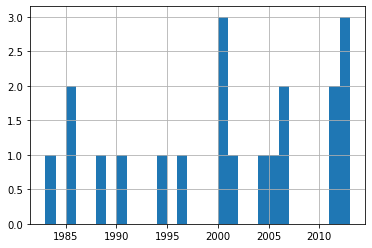

In [41]:
# теперь можно посмотреть как часто появлялись новые платформы
wdf_platform['first_year'].hist(bins=30)

в 2000 м году на свет появились сразу 3 новые платформы. скорее всего маркетинг решил что продукт нужно выпускать в этом году чтоб не оказаться платформой из прошлого тысячалетия и казаться современнее(хотя формально отсчёт нового тысячалетия следует начинать с 1 января 2001 года).

Далее буду работать с данными с 2014 по 2016 год, для того что бы ориентироваться на данные более современных платформ.

Но мне казалось что в данных с 2000 года можно найти ценность в виде отслеживания влияния оценок критиков и пользователей на продажи, но будем пользоваться более свежими цифрами.

In [42]:
# создам датафрейм с данными для актуальных платформ
wdf_actual = wdf.loc[(wdf['year_of_release'] > 2013) & (wdf['platform'].isin(list(wdf_platform['platform'])))]

In [43]:
# сведу таблицу для обзора суммарных продаж по платформам с 2014 по 2016 годы
pivot_df = pd.pivot_table(wdf_actual, index='year_of_release', columns='platform', values='all_sales',aggfunc='sum').reset_index()
pivot_df

platform  year_of_release    3DS     PC    PS3     PS4   PSP    PSV   Wii  \
0                  2014.0  43.76  13.28  47.76  100.00  0.24  11.90  3.75   
1                  2015.0  27.78   8.52  16.82  118.90  0.12   6.25  1.14   
2                  2016.0  15.14   5.25   3.60   69.25   NaN   4.25  0.18   

platform   WiiU   X360   XOne  
0         22.03  34.74  54.07  
1         16.35  11.96  60.14  
2          4.60   1.52  26.15

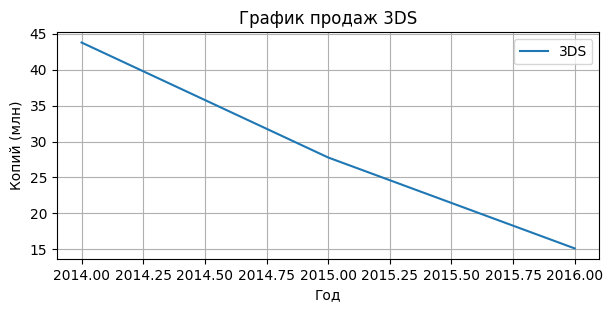

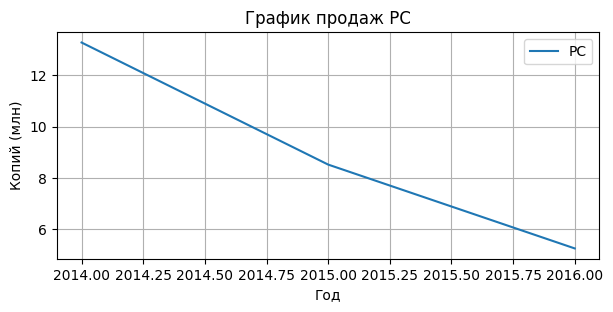

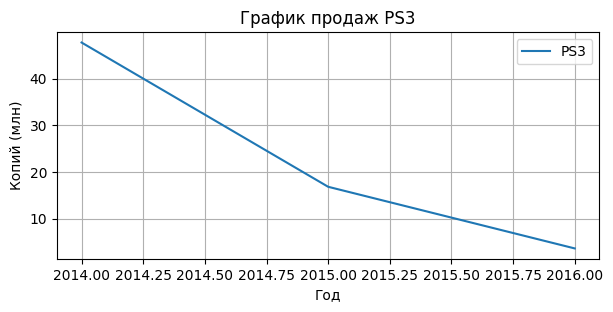

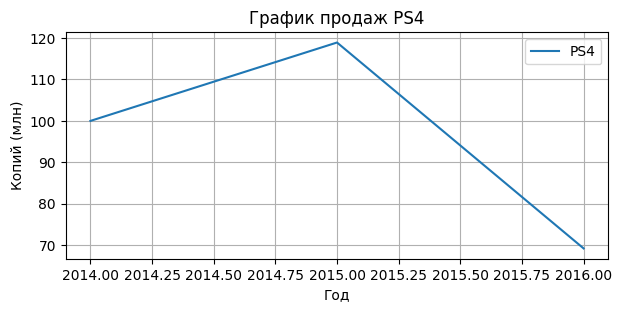

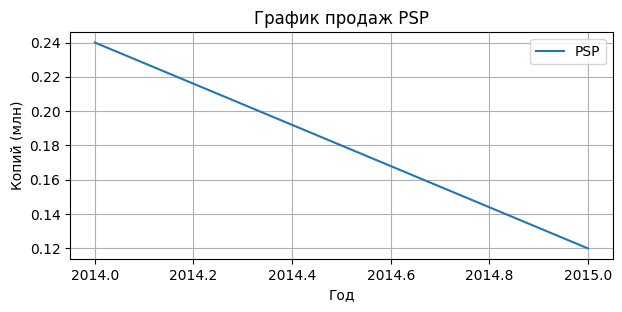

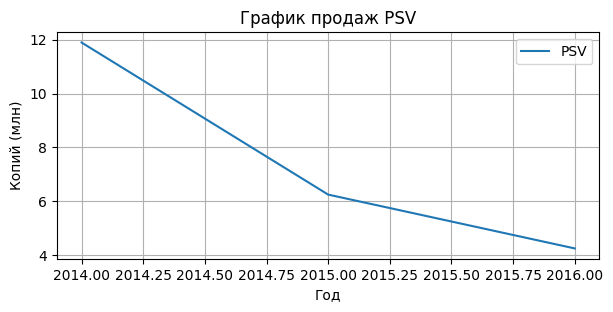

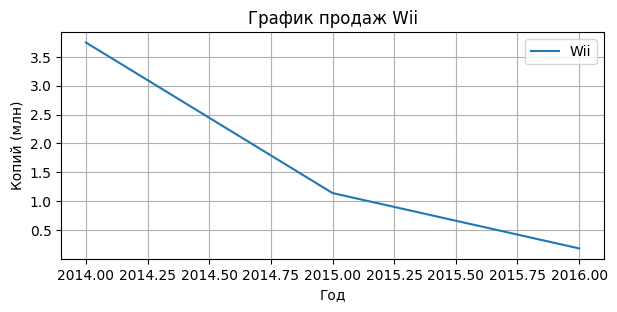

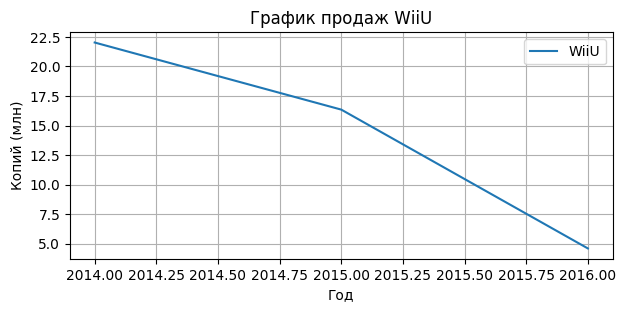

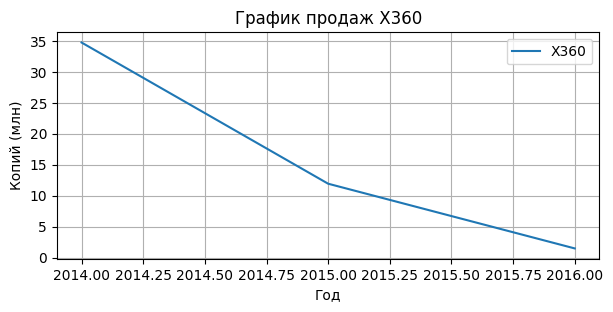

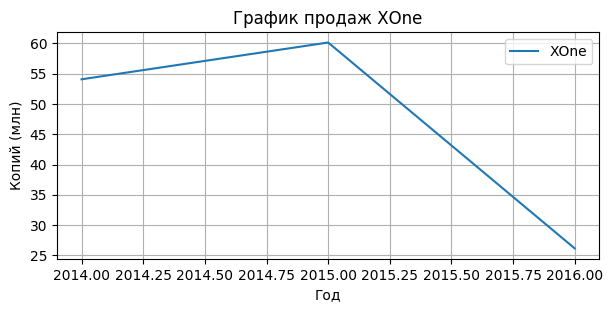

In [44]:
for col in pivot_df.columns.values[1:]:
    plt.figure(figsize=(7,3), dpi=100)
    sns.lineplot( x=pivot_df['year_of_release'], y=pivot_df[col], label=col )
    plt.grid(True)
    plt.title(f'График продаж {col}')
    plt.xlabel('Год')
    plt.ylabel('Копий (млн)')
    plt.show()

In [45]:
# сведу таблицу для обзора количества релизов по платформам с 2014 по 2016 годы
pivot_df = pd.pivot_table(wdf_actual, index='year_of_release', columns='platform', values='name', aggfunc='count').reset_index()

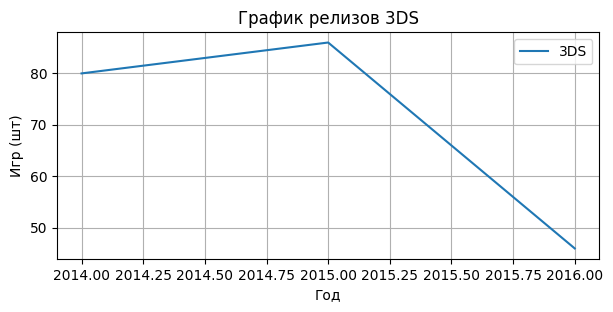

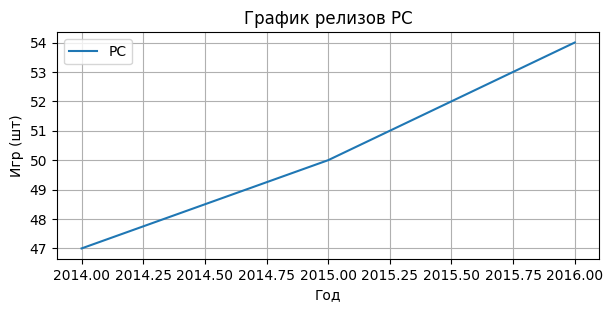

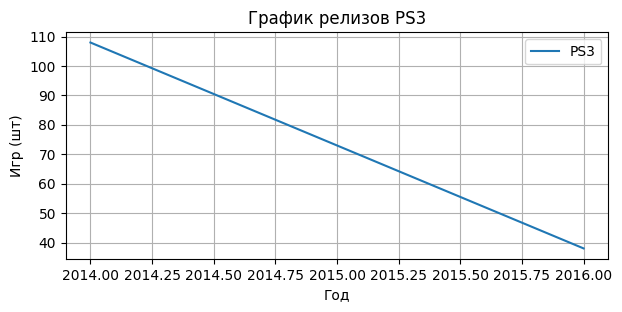

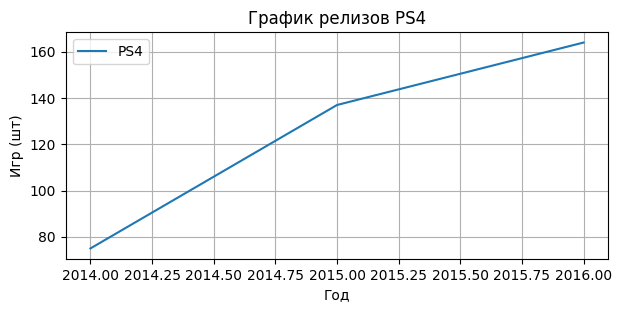

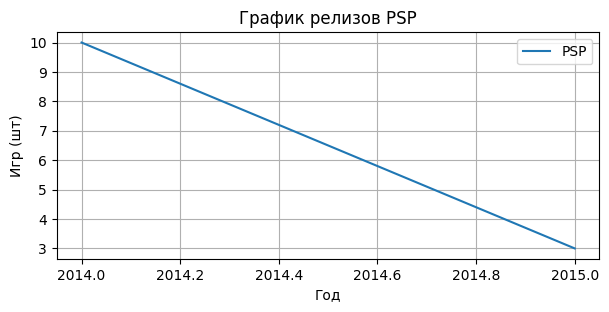

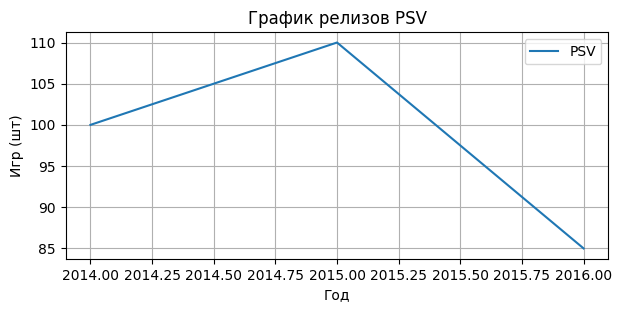

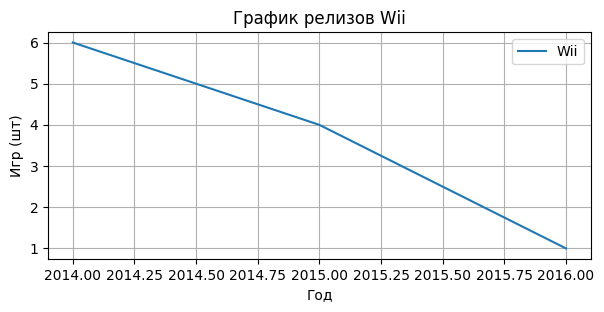

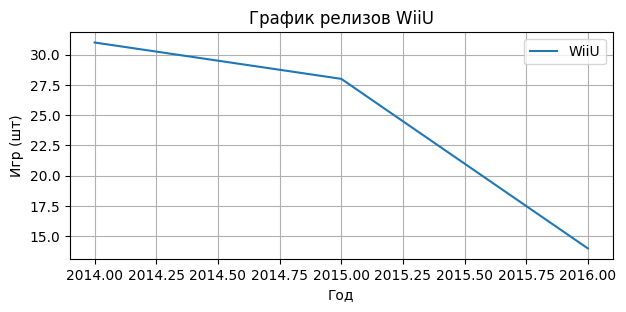

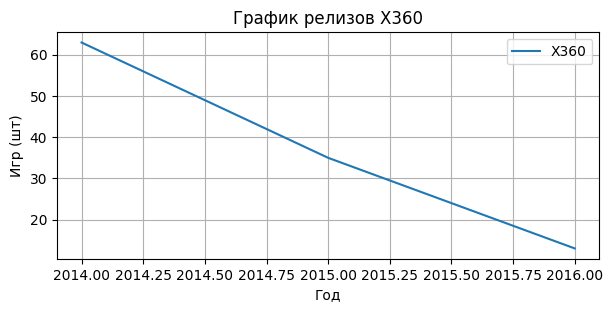

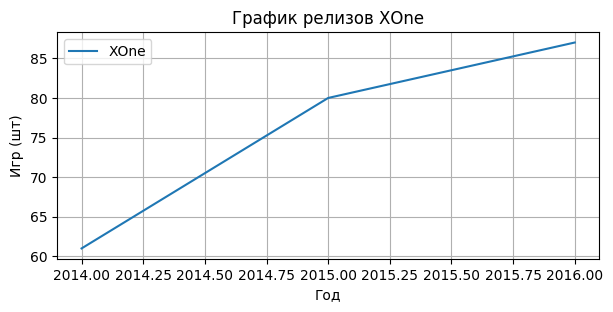

In [46]:
for col in pivot_df.columns.values[1:]:
    plt.figure(figsize=(7,3), dpi=100)
    sns.lineplot( x=pivot_df['year_of_release'], y=pivot_df[col], label=col )
    plt.grid(True)
    plt.title(f'График релизов {col}')
    plt.xlabel('Год')
    plt.ylabel('Игр (шт)')
    plt.show()

На графиках видна цикличность жизни платформ что и подтверждает выводы о продолжительности жизни и лучших годах платформ. 
Количество платформ к 2016 году выросло а количество продаж наоборот убавилось - выбирать на кого ставить в следующем году надо будет очень тщательно.

### Какие платформы лидируют по продажам?
Растут или падают? Выберите несколько потенциально прибыльных платформ.

Внимательнее посмотри на живые платформы - как у них идут дела?


Соберу таблицу с данными для актуальных платформ

In [47]:
# сведу таблицу группировав данные о продажах по плотформам 
pivot_df = pd.pivot_table(wdf_actual,  index='year_of_release',columns='platform', values='all_sales',aggfunc='sum')

In [48]:
# отберем только живые платформы
wdf_platform_live = wdf_platform[wdf_platform['is_live']]

In [49]:
# разверну таблицу для удобства 
pivot_df = pivot_df.T 

In [50]:
pivot_df = pivot_df.fillna(0)

In [51]:
# с помощью замечательного метода pct_change вычислю процент изменения продаж между двумя посмледними годами(2015 и 2016)
pivot_df['up_sales_pct'] = (pivot_df.pct_change(periods=1, axis=1)[2016.0].fillna(0) * 100).round(0)

In [52]:
# солью новые вычисления в рабочую таблицу  по платформам 
wdf_platform_live = wdf_platform_live.merge(pivot_df[[2016.0,'up_sales_pct']],how='left',left_on='platform', right_on='platform')

In [53]:
wdf_platform_live

platform  first_year  last_year  period  is_live  count_games  sum_sales  \
0      3DS      2011.0     2016.0     6.0     True          512     259.00   
1       PC      1985.0     2016.0    32.0     True          957     259.52   
2      PS3      2006.0     2016.0    11.0     True         1306     939.65   
3      PS4      2013.0     2016.0     4.0     True          392     314.14   
4      PSV      2011.0     2016.0     6.0     True          429      54.07   
5      Wii      2006.0     2016.0    11.0     True         1286     907.51   
6     WiiU      2012.0     2016.0     5.0     True          147      82.19   
7     X360      2005.0     2016.0    12.0     True         1232     971.42   
8     XOne      2013.0     2016.0     4.0     True          247     159.32   

   year_top_sales  top_sales  top_year_life  2016.0  up_sales_pct  
0          2011.0      63.20            1.0   15.14         -46.0  
1          2011.0      35.03           27.0    5.25         -38.0  
2          2011.0     156.78            6.0    3.60         -79.0  
3          2015.0     118.90            3.0   69.25         -42.0  
4          2012.0      16.19            2.0    4.25         -32.0  
5          2009.0     206.97            4.0    0.18         -84.0  
6          2014.0      22.03            3.0    4.60         -72.0  
7          2010.0     170.03            6.0    1.52         -87.0  
8          2015.0      60.14            3.0   26.15         -57.0

НА графиках было видно, но теперь и цифры подтверждают - продажи падают у всех платформ без исключения. Даже на платформах которым всего 4год от роду.
 Неужели закат эры платформенных игр? Все теперь играют на смартфонах? может данные за 2016 год не полные - не все успели отчитаться о продажах и т.п.

Лучшие продажы в 2016 года показала платформа PS4, судя по графикам она лидирует уже несколько лет и она относительно молода - её всего 4 года. 

### Построим график «ящик с усами» 
по глобальным продажам игр в разбивке по платформам.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



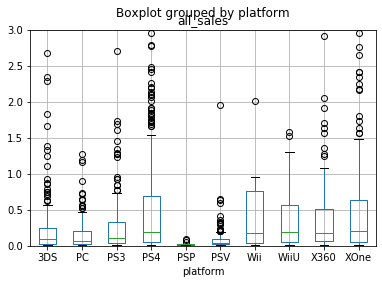

In [54]:
wdf_actual.boxplot(column='all_sales', by='platform');
plt.ylim(0,3);

Практически у всех платформ одна и таже картина - большинство игр продаются небольшим количеством, и только десятки или даже единицы распространяются десятками миллионов копий. Как раз такие игры и указывают на успешность платформы. Посмотрим на игры по вниматеольнее - что о них говорят игроки и критики.

### Как влияют отзывы пользователей и критиков? 
на продажи внутри одной популярной платформы.

Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.

In [55]:
filtred_df = wdf_actual[wdf_actual['platform']=='PS4'].dropna()

<Figure size 3000x1200 with 0 Axes>

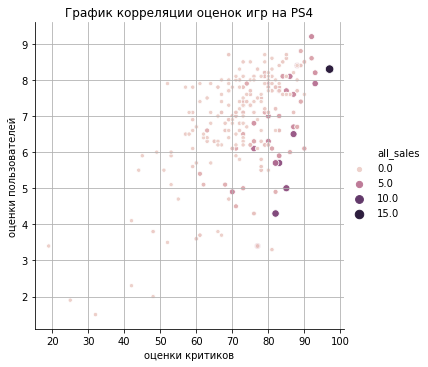

In [56]:
plt.figure(figsize=(10,4), dpi=300)
sns.relplot(x="critic_score", y="user_score", size="all_sales", data=filtred_df, hue='all_sales' )

plt.grid(True)
plt.title('График корреляции оценок игр на PS4')
plt.xlabel('оценки критиков')
plt.ylabel('оценки пользователей')
plt.show();

In [57]:
dt = (filtred_df[['all_sales','critic_score','user_score']].corr()).round(2)

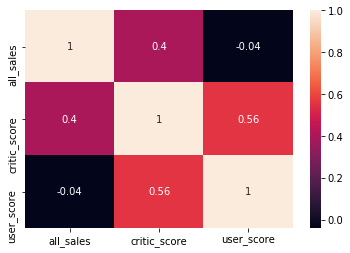

In [58]:
sns.heatmap(dt, annot = True);

In [59]:
# fig = px.imshow(dt, text_auto=True)
# fig.update_layout( autosize=False, width=300, height=300,)
# fig.show()

По выбранной мной платформе PS4 корреляция между оценками критиков и пользователеь есть но я бы сказал что в 50% случаях они не согласны в оценках игры. 

Оценки критиков влияют на продажи игр очень заметно, а вот оценки пользователей почти никак. Пользователи часто доверяю оценкам критиков и покупают игру, а затем уже пишут свои отзывы, но вернуть то игру уже нельзя).(хотя лично пережил прецедент с CyberPunk2077 где издатель возвращал деньги желающим - но скорее это исключение)


### Соотнесем выводы с продажами игр на других платформах.

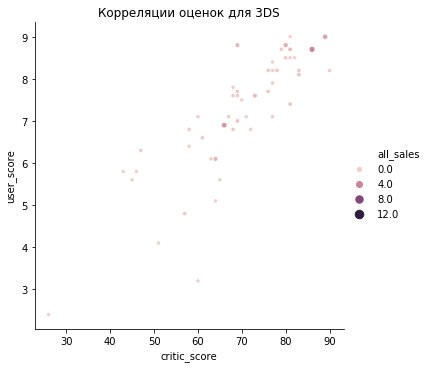

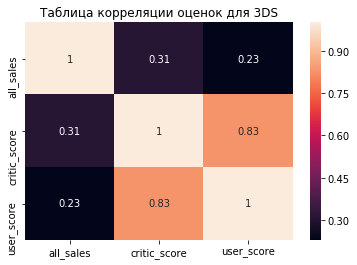

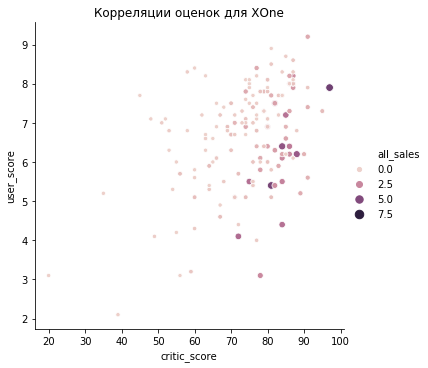

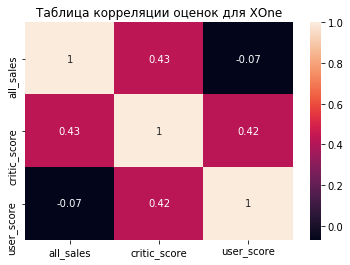

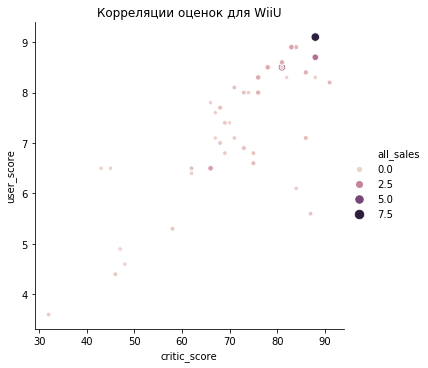

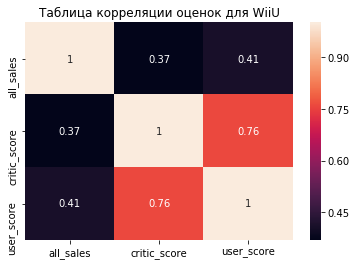

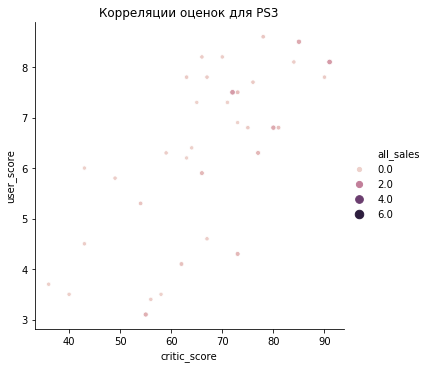

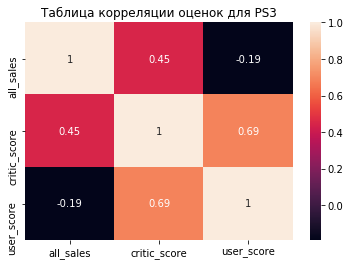

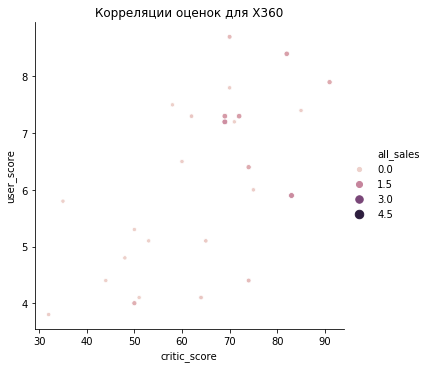

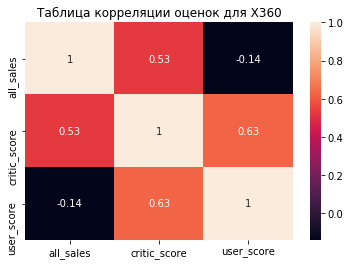

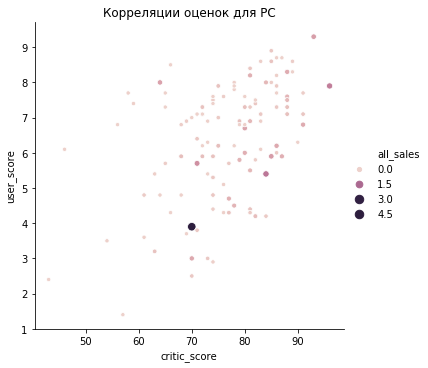

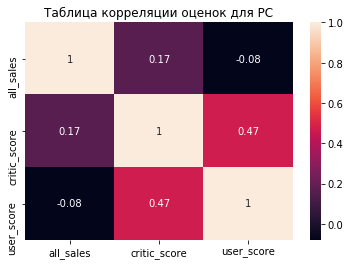

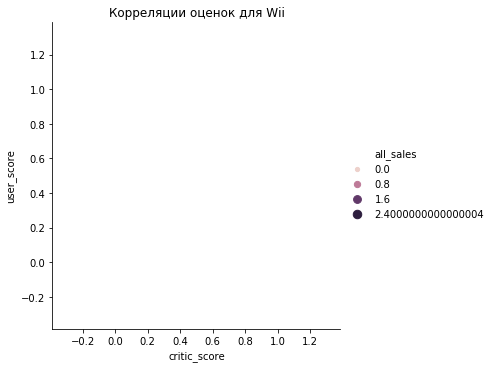

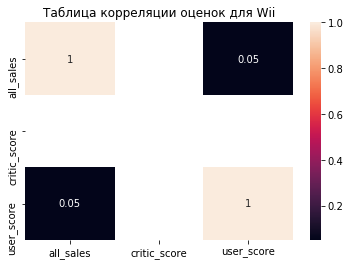

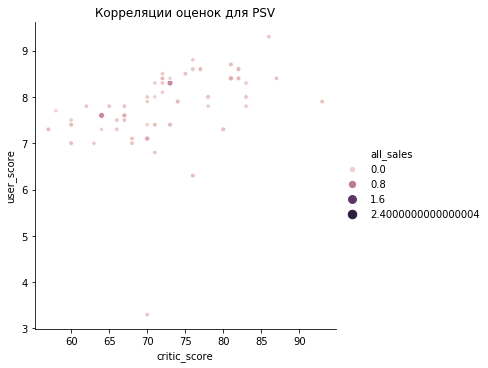

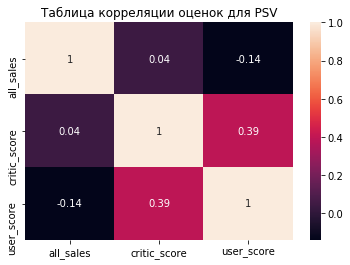

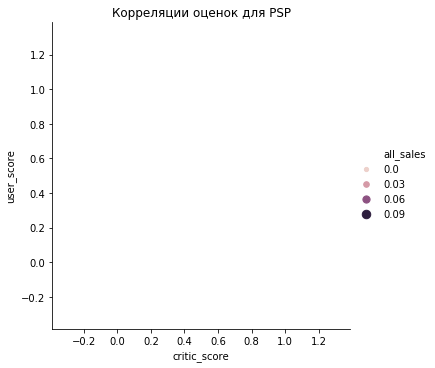

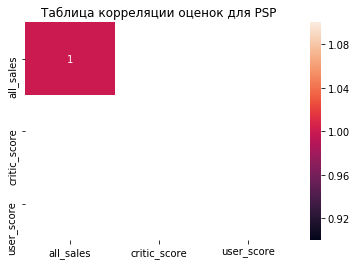

In [60]:
# создадим цикл для вывода графиков корреляции для остальных платформ
for item in wdf_actual[~(wdf_actual['platform']=='PS4')]['platform'].unique():

    filtred_df = wdf_actual[wdf_actual['platform']== item ][['platform','critic_score','user_score','all_sales']]
    dt = (filtred_df[['all_sales','critic_score','user_score']].corr()).round(2)
   
    sns.relplot(x="critic_score", y="user_score", size="all_sales", data=filtred_df, hue='all_sales')
    plt.title(f'Корреляции оценок для {item}')
    plt.show()
    sns.heatmap(dt, annot = True )
    plt.title(f'Таблица корреляции оценок для {item}')
    plt.show()


В целом картина корреляции оценок на других платформах похожа, но WiiU показывает сосвсем другое - на этой платформе продажи коррелируют сильнее с оценками пользователей, а также тут самый высокий показатель согласия игроков и критиков. Wii - последние годы совсем не оценивалось крииками - скорее всего платформа доживает последние годы.

### Общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [61]:
wdf_actual['genre'].value_counts(normalize=True)

Action          0.366489
Role-Playing    0.130847
Adventure       0.109532
Sports          0.095323
Shooter         0.075784
Misc            0.066903
Racing          0.040853
Fighting        0.035524
Simulation      0.026051
Platform        0.022499
Strategy        0.021906
Puzzle          0.008289
Name: genre, dtype: float64

In [62]:
dt = pd.pivot_table(wdf_actual,index='genre',values='all_sales',aggfunc=['sum','count','median']).reset_index()
dt.columns = ['genre','all_sales','count_games','median']

STR (СТР) – это коэффициент продаваемости того или иного продукта, показатель, демонстрирующий, насколько востребован товар. Расшифровывается как Sell Through Rate, что можно перевести как «процент успешных продаж».

In [63]:
fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'xy'}]],
                    subplot_titles=['Распределение релизов', 'Распределение продаж', 'доходность жанра' ])

fig.add_trace(go.Pie(labels=dt['genre'], values=dt['count_games']), 1, 1)
fig.add_trace(go.Pie(labels=dt['genre'], values=dt['all_sales']), 1, 2)
fig.add_trace(go.Bar(x=dt["genre"],y=dt['median']), 1, 3)

fig.update_layout(title_text='Распределения по жанрам игр')
fig.show()


Чаще всего релизят игры в жанре Action, и покупают их соответсвенно тоже чаще.
Но интересно посмотреть на коэффициент продаваемости - тут лидирует жанр Shooter. Получается что шуттеры имеют больше продаж на одну выпущенную игру, чем вдругих жанрах. 

Самый 'неудачный' жанр - Adventure. Хоть из релизов это и 6.7% от всех жанров но от общих продаж это всего почти 2%.

## Портрет пользователя каждого региона 
<a class="anchor" id="user_profil"></a>


In [64]:
# функция для вызова инструмента построения графиков
def get_bars(data, whath_look, where_look, how='sum' ,titl='Надпись'):
    dt = pd.pivot_table(data=data, index=whath_look, values=where_look, aggfunc=how)  # отфильтровываем данные

    fig = make_subplots(1, len(where_look), specs=[[{'type':'xy'}] * len(where_look)],   # создаем конструкт для нескольких графикв
                    subplot_titles=where_look)
    
    for i, val in enumerate(where_look, start=1):                # цикл для добавления на subplots графиков
        filtred_dt = dt[val].sort_values(ascending=False).head()
        fig.add_trace(go.Bar(x=filtred_dt.index ,y=filtred_dt ,name=val), 1, i)

    fig.update_layout(title_text=titl)
    fig.show()

lst_region = ['na_sales','eu_sales','jp_sales', 'other_sales']

###	Самые популярные платформы (топ-5).



для анализа популярности платформ возьмем платформы посвежее - игры для которых продаются последние несколько лет - с 2013 года - когда появились последние новые платформы.

In [65]:
get_bars(wdf_actual, 'platform', lst_region, 'sum', 'Топ 5 платформ в регионах')

В каждом регионе выделяестя PS4 , но в Японии обожают Нинтендо и её портативную 3DS и не взлюбили  платформы от Microsoft. В Японии рынок уже поделен между Нинтендо и Сони и новым платформам туда зайти будет очень сложно.


###	Самые популярные жанры.

In [66]:
get_bars(wdf_actual, 'genre', lst_region, 'sum', 'Топ 5 жанров в регионах')

И тут у Японцев свои предпочтения  - на первом месте RPG, в остальном же мире больше любят Action

### Рейтинги ESRB проданных игр.

In [67]:
get_bars(wdf_actual.fillna('n/d'), 'rating', lst_region, 'mean', 'Топ 5 рейтингов ESRP в регионах')

В Японии своя система оценки возростного рейтинга для игр.
Из <a href="https://kanobu.ru/articles/stavlyu-na-cero-368311/">источника</a> известно что в японии большинство игр с рейтингом "для всех".


В остальных регионах графики показывают почти одинаковые данные по распределению рейтингов продаваемых игр:  

- «Mature» — Для взрослых: от 17 лет и старше
- «Everyone» — Для всех 
- «Everyone 10 and older» — Для всех от 10 лет и старше
- «Teen» — «Подросткам»:  для лиц от 13 лет

Получается что рейтинг  почти не влияет на продажу игр в отдельных регионах.


### Продаваемые жанры в зависимости от рейтинга

Идея такая - что для определенных жанров лучше продаются игры с определенным возрастным рейтингом. То есть для жанра Shooter обычно ставят rating M(для взрослых) и T(для подростков), так как в играх данного жанра обычно должно присутствать оружие и жестокость. И если такого нет , и можно поставить возрастные ограничения ниже (E и E10+) то востребованними такие игры не будут.

In [68]:
# отфильтрую в датафрейме самые поплулярные жанры и возрастные рейтинги
list_genre = ['Shooter','Sports','Action']
list_platfom = ['PS3','PC','X360']
list_rating = ['M','T','E','E10+']
filtred_wdf_2000_live =  wdf_actual[(wdf_actual['platform'].isin(list_platfom)) & (wdf_actual['genre'].isin(list_genre)) &  (wdf_actual['rating'].isin(list_rating))]

In [69]:
pivot_filtred_wdf_2000_live = pd.pivot_table(filtred_wdf_2000_live, index='genre',columns='rating',values='na_sales', aggfunc=['count','sum','mean']).fillna(0).round(2).T.reset_index()
pivot_filtred_wdf_2000_live.iloc[8:]

genre level_0 rating  Action  Shooter  Sports
8        mean      E    0.01     0.00    0.27
9        mean   E10+    0.20     0.18    0.20
10       mean      M    0.14     0.28    0.00
11       mean      T    0.02     0.34    0.18

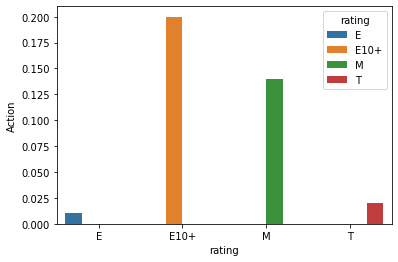

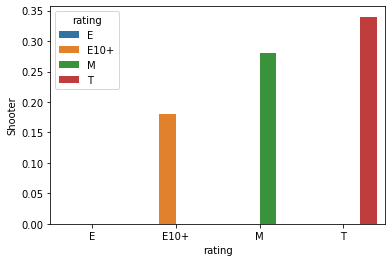

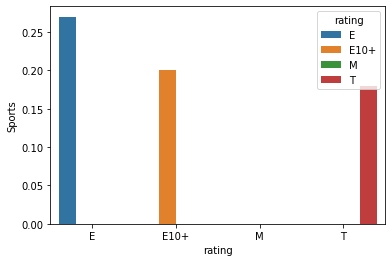

In [70]:
for col in pivot_filtred_wdf_2000_live.iloc[8:].columns[2:]:
    sns.barplot(data=pivot_filtred_wdf_2000_live.iloc[8:], x='rating', y=col, hue='rating')
    plt.show()

Попробовал подтвердить размышления - в строках mean мы видим кооэфицент продаваемости.  У жанра Shooter лучше всего продаваемость на rating - M(для взрослых), а у Sport на rating E(для всех) продаётся лучше чем T(для подростков).

## Проверка гипотез
<a class="anchor" id="hypothesis"></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки правдоподобия статистической гипотезы о равентсве средних значений двух выборок используем параметрический критерий значимости t-критерий Стьюдента, который служит для проверки гипотез о параметрах распределений.

In [71]:
# Отфильтрую требуемы данные для проверки гипотеы в отдельный датафрейм
dt = wdf_actual.loc[wdf_actual['platform'].isin(['XOne','PC'])][['platform','user_score']].dropna()
dt.head()

platform  user_score
165     XOne         7.9
179     XOne         5.4
242     XOne         6.4
270     XOne         6.2
373     XOne         4.1

In [72]:
# посмотрим на описательную статистику выборок 
pd.pivot_table(dt,values='user_score',index='platform', aggfunc=['count','mean','std']).T.round(2)

platform              PC    XOne
count user_score  123.00  168.00
mean  user_score    6.31    6.60
std   user_score    1.71    1.37

In [73]:
fig = px.histogram(dt, x="user_score", y='user_score', opacity=0.6,
                   histfunc='count',color="platform",nbins=100, marginal="box") 
fig.update_layout(barmode='overlay')
fig.show()

Выборки по XOne и PC за последние 3 года почти равны. Средние не много отличаются - но  соответвенно и нужно проверить можно ли такое отличие получить случайным образом. Сравним  выборки используя критерий Стьюдента и применим метод st.ttest_ind. 
<br>

Сформулирую гипотезы: 
H0 - Среднее пользовательские рейтинги платформ Xbox One и PC одинаковые. 
H1 - Среднее пользовательские рейтинги платформ Xbox One и PC отличаются.

In [74]:
data1 = dt[dt['platform'] == 'XOne']['user_score']
data2 = dt[dt['platform'] == 'PC']['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data1, data2,equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.13130164268727834
Не получилось отвергнуть нулевую гипотезу


p-значение больше заданного уровня статистической значимости - это означает что нет сущетвенной разницы между средними двух выборок, а получить наблюдаемое различие случайным образом очень вероятно. Следовательно нулевую гипотезу нельзя отвергнуть отвергнуть. <br>
Это означает что сренее значение рейтинга платформ не различаются.

### Средние пользовательские рейтинги жанров Action и Sports разные.

In [75]:
# Отфильтрую требуемы данные для проверки гипотеы в отдельный датафрейм
dt = wdf_actual.loc[wdf_actual['genre'].isin(['Action','Sports'])][['genre','user_score']].dropna()
dt.head()

genre  user_score
42   Action         8.3
77   Sports         4.3
94   Sports         5.0
143  Sports         5.7
165  Action         7.9

In [76]:
# посмотрим на описательную статистику выборок 
pd.pivot_table(dt,values='user_score',index='genre', aggfunc=['count','mean','std']).T.round(2)

genre             Action  Sports
count user_score  313.00  131.00
mean  user_score    6.75    5.29
std   user_score    1.41    1.89

In [77]:
fig = px.histogram(dt, x="user_score", y='user_score', opacity=0.6,
                   histfunc='count',color="genre",nbins=100,  marginal="box") 
fig.update_layout(barmode='overlay')
fig.show()

Для проверки статистической гипотезы о том, что две независимые выборки данных имеют одинаковое распределение испольльзуется т-тест.
Мы хотим сравнить средние значения двух независимых выборок.
Одним из наиболее часто используемых t-тестов является t-критерий независимых выборок. T-тест Студента доступен на Python через функцию ttest_ind из модуля SciPy.

Когда две выборки имеют разные стандартные отклонения необходимо аргументу equal_var передать False (будет выполняеться проверка Уэлша...)

Определим нулевую и альтернативную гипотезы:
- Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковы. 
- Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [78]:
data1 = dt[dt['genre'] == 'Action']['user_score']
data2 = dt[dt['genre'] == 'Sports']['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(data1,data2, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.3080710852425688e-13
Отвергаем нулевую гипотезу


Р-значение очень мало - мало вероятно что при нулевой гипотезе две данные выборки были из совокупностей с одинаковыми средними. Следоватенльно отвергаем нулевую гипотезу о равности средних значений рейтингов  жанров Action и Sports, что подтверждает нашу гипотезу о их разности.

# Вывод

<a class="anchor" id="finish"></a>

---



Полученные данные позволили выявить определяющие успешность игры закономерности- какие игры ,каких платформ и в какой период лучше продаются.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br><br>
И так вывод получился такой: 
- в 2017 году будут популярны игры жанра: Action, Shooter, Sports
- пользователи будут покупать игры на платформах: X360, PS3, Wii
- продаваться будут лучше игры с возрастным рейтингом: E, T, M

Среди регионов к Японии нужен индивидуальный подход.
<br>
<br>
Также необходимо обратить внимание на то что игры жанра Shooter ,удут лучше продаваться с рейтингом - для тинейджеров  и взрослых , игрокам нужно "мясо" , безкровные шутеры никому не нужны.
<br><br>

Изучаемые данные не позволили подтвердить гипотезу об одинаковости средних пользовательских рейтингов платформ Xbox One и PC - похоже на правду, потому что на PC игры играются качественно совсем по другому - атмосфернее.
А также подтвердили гипотезу о том что средние пользовательские оценки для игр жанров Action и Sports разные.
<br><br>
100 % верным решением будет поставить ориентироваться на игры для платформ PS4 и XOne, жанра Shooter Action с рейтингом M или T,и Sport с рейтингом E и E10+.
Но для Японии справедливым будет совсем другое решение.
